**<h1><center>Lab-4-Report </center></h1>**

**<h1><center>EE5175: Image Signal Processing </center></h1>**


<h4><center>Under the guidence of </center></h4>
<h4><center>Prof. AN.Rajagopalan </center></h4>

<center>By EE21S048</center>

<h9>Date of submission: 23-02-2022<h9>

#**Space Invarient Blur:**
---
**Q:**Perform Gaussian blurring on Mandrill.pgm with standard deviation σ.




**Import the Libraries:**

In [15]:
from numpy import *
import sys
import math
import cv2
import matplotlib.pyplot as plt

**Read The Mandrill Image:**

256 256


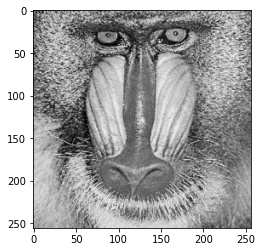

In [16]:
img= cv2.imread("Mandrill.png",0)
width, height= img.shape #finding the no' of pixels in x axis and y axis of image1
print(width, height)
plt.imshow(img,'gray')

##**Constructing Gaussian Blur Kernel:**

**Determing Gaussian Kernel size:**

*   Given the value of deviation of Gaussian blur kernel: σ
*   The Kernel size is given by  $(6σ+1)*(6σ+1)$ 
*   If the kernel size is even make it odd for ease in calculations.
*   Given values of σ: [1.6, 1.2, 1.0, 0.6, 0.3, 0.0]

In [17]:
sigma=1.6
k_size=math.ceil(6*sigma+1)
if k_size%2==0:         #if the kernel size is even then add 1 to make it odd for 
  k_size=k_size+1
print(k_size)

11


**Construct the Gaussian Kernel:**

In Discrete approximation:


*   Gaussian Kernel h is defined as :
<center>$h(m,n)=1/(\sqrt{2\pi}\sigma^2)*e^{-(m^2+n^2)/(2\sigma^2)}$</center>

*   We normalise the kernel to make entries sum equal to 1 and define the normalised Gaussian Kernel as:
<center>$h(m,n)=1/(\sqrt{2\pi}σ^2sum)*e^{-(m^2+n^2)/(2\sigma^2)}$</center>

 

*   where 'Sum' is the sum of all the elements of gaussian kernel.
 <center>$sum=\sum_{m,n=-t}^{\ m,n=t} h(m,n) = 1$</center>



In [18]:
kernel=zeros([k_size,k_size])
t=k_size//2                                         
const=1/(2*pi*sigma**2)
for i in range(k_size):
  for j in range(k_size):
    kernel[i,j]=const*exp((-(i-t)**2-(j-t)**2)/(2*(sigma**2)))     #Building Gaussian blur kernel
kernel=kernel/sum(kernel)                                          #normalizing the values of kernel to sum upto 1
print(t)

5


##**2D Convolution:** 
In the digital domain, convolution is performed by multiplying and accumulating the instantaneous values of the overlapping samples corresponding to two input signals, one of which is flipped.  



*   We zero pad the image on each side with zeroes of size k_size//2.
*   Because when kernel is applied on the corners of the image, kernel center coincides with the pixel and there are missing values in the image.

*   To encounter these missing values we padd zeros of length (kernel_size/2) on the four sides of the image.


In [ ]:
#Padding for convolution
img_padded=zeros((width+2*(k_size//2), height+2*(k_size//2)))
img_padded[(k_size//2):-(k_size//2),(k_size//2):-(k_size//2)]=img


*   The next thing that we must do is apply cross correlation to our kernel.
*   This can be done using NumPy very easily through just flipping the matrix horizontally then vertically.


In [ ]:
#flipping the matrix horizontally and vertically
kernel = flipud(fliplr(kernel))

**Convolution of Blur Kernel and the image:**

*   We perform 2D convolution by sliding the kernel over the image.
*   We place the kernel on the image such that the image pixel coincides with the center pixel of the kernel.
*   In our image, we'll start sliding the kernel column-wise first and then advance along the rows.
*   We compute the product of the overlapping pixels and calculate their sum. 
*   The result will be the value of the output pixel at that particular location.





In [ ]:
op_img=zeros([width,height])                     #op_img is the target or output image
for x in range(t,width+t):                       #traversing from t to width+t on padded image
  for y in range(t,height+t):                    #traversing from t to height+t on padded image
    op=0                                         #setting sum of output pixel to 0
    for i in range(k_size):                      #traversing through the kernel 
      for j in range(k_size):
        op+=kernel[i,j]*img_padded[x-t+i,y-t+j]  #multiplying and summing up the values
    op_img[x-t,y-t]=op                           #assigning sum to the output pixel

*   Display the blurred image along with the original to compare:

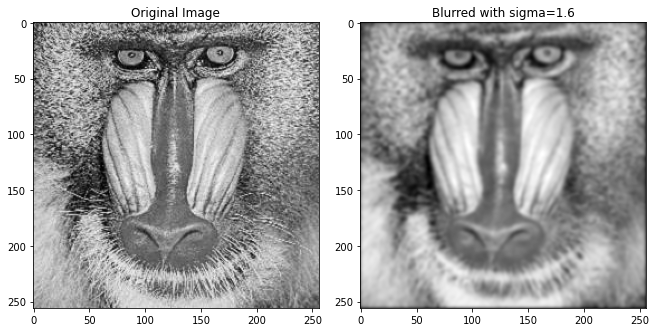

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,12), constrained_layout=True)
ax1.imshow(img,'gray')                #displaying gray scale image
ax1.title.set_text("Original Image")  #setting title to the figure
ax2.imshow(op_img,'gray')       
ax2.title.set_text("Blurred with sigma=1.6")

*   Now we will run the code for all the sigma values
*   σ: [1.6, 1.2, 1.0, 0.6, 0.3, 0.0]

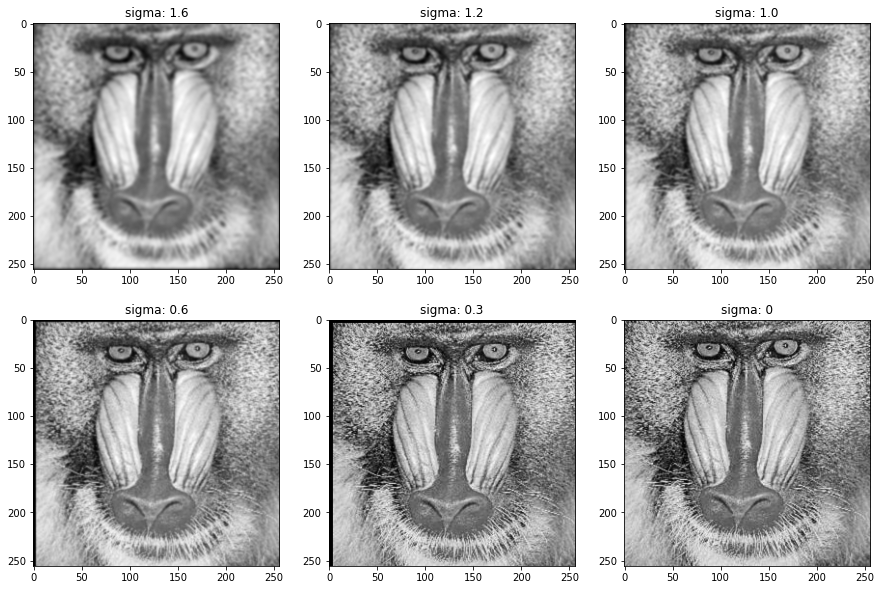

In [ ]:
fig=plt.figure(figsize=(15,10))
#figsize=(15,15)
axes=[]
sigma_a=([1.6,1.2,1.0,0.6,0.3,0])
length=len(sigma_a)
for l in range(length):
  sigma=sigma_a[l]
  
  #find kernel size
  k_size=math.ceil(6*sigma+1)
  if k_size%2==0:
    k_size=k_size+1 

  #built Gaussian Kernel
  kernel=zeros([k_size,k_size])
  t=k_size//2
  if(k_size!=1):

    const=1/(2*pi*sigma**2)
    for i in range(k_size):
      for j in range(k_size):
        kernel[i,j]=const*exp((-(i-t)**2-(j-t)**2)/(2*(sigma**2)))
    kernel=kernel/sum(kernel) 

    #Apply kernel on the padded image:
    op_img=zeros([width,height])
    for x in range(t,width+t):
      for y in range(t,height+t):
        op=0
        for i in range(k_size):
          for j in range(k_size):
            op+=kernel[i,j]*img_padded[x-t+i,y-t+j]
        op_img[x-t,y-t]=op

    #Displaying the image:    
    axes.append(fig.add_subplot(2,3,l+1))
    subplot_title=("sigma: "+str(sigma))
    #plt.figure(l+1)
    axes[-1].set_title(subplot_title)
    plt.imshow(op_img,'gray')
  else: 
    #case where kernel is 1x1 
    #plt.figure(l+1)
    axes.append(fig.add_subplot(2,3,l+1))
    subplot_title=("sigma: "+str(sigma))
    axes[-1].set_title(subplot_title)
    plt.imshow(img,'gray')


##**Conclusion:**

*   Thus we obtained blurred images for different values of standard deviation.
*   We ensure that the Gaussian kernel values are normalized to avoid amplification or attenuation of pixel values. 
*   The more is the deviation value the wider is the Gaussian curve indicating less sharpness and the image will be more blurred.

